<a href="https://colab.research.google.com/github/Nirzaree/MLWithPython/blob/master/ML_Learning_101_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### K Nearest Neighbors Algorithm
Choose the class for a given new data point based on **k** nearest neighbors of the data point in the feature space 

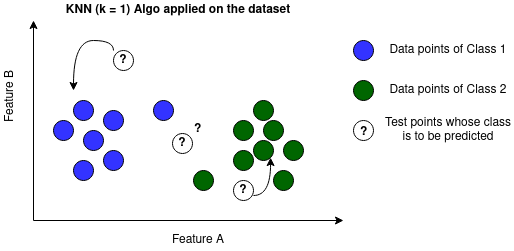

* Concept theory 

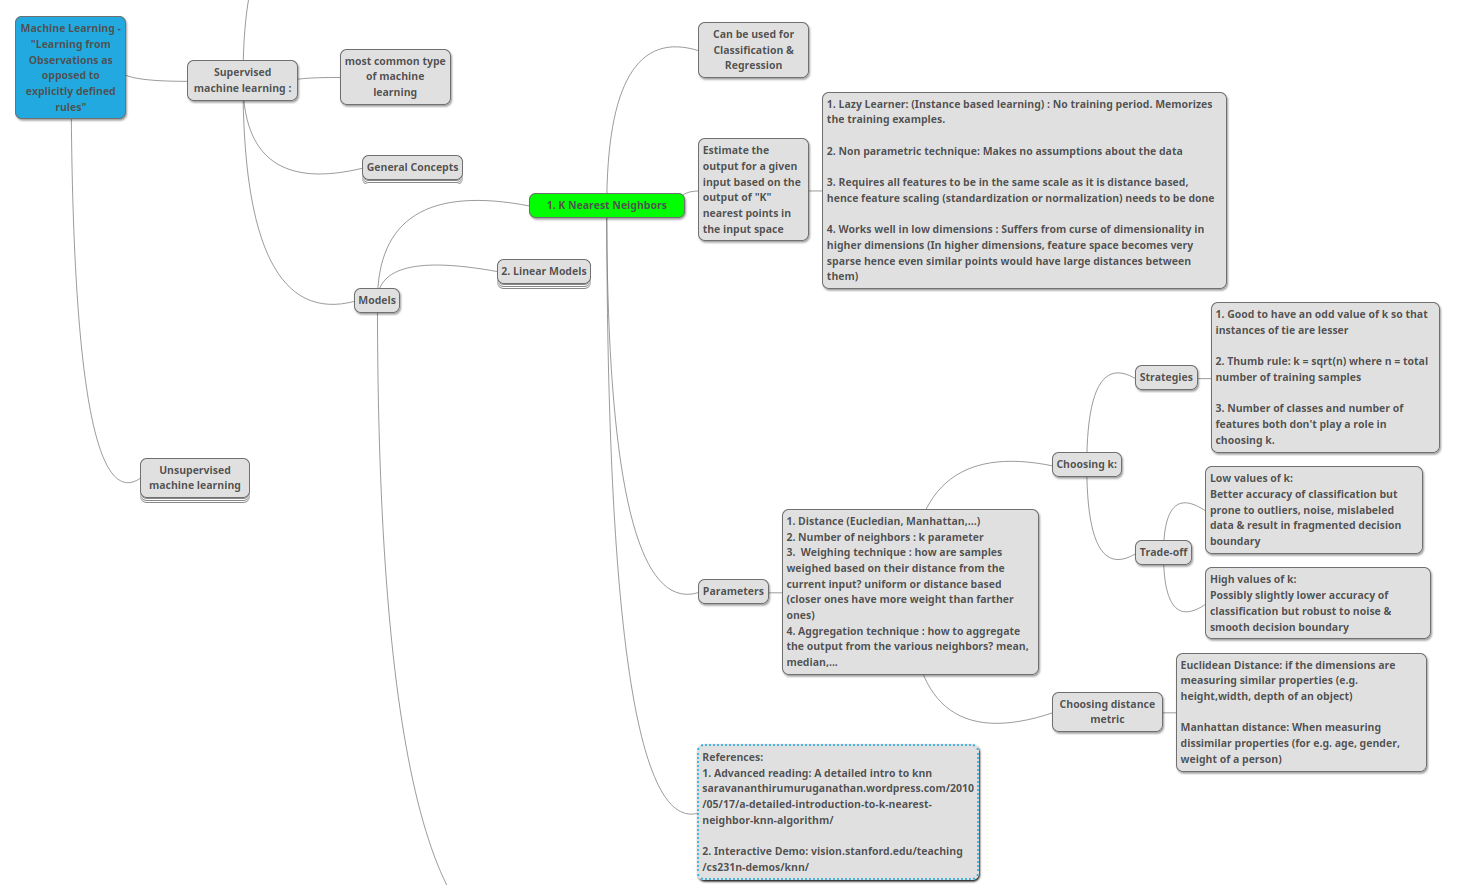

# Case Studies

## Setup 

In [ ]:
### setup 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

from sklearn.datasets import make_classification,make_regression

In [ ]:
#get adspy course scripts from drive
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! cp "/content/drive/My Drive/Colab Notebooks/adspy_shared_utilities.py" .
! cp "/content/drive/My Drive/Colab Notebooks/Original Data/CommViolPredUnnormalizedData.txt" .
! cp "/content/drive/My Drive/Colab Notebooks/Original Data/fruit_data_with_colors.txt" .

 ## Classification

### 1. Fruits Dataset 

 From the course [Applied Data Science in Python - Coursera](https://www.coursera.org/learn/python-machine-learning)

In [ ]:
FruitsData = pd.read_table('fruit_data_with_colors.txt')

In [ ]:
# type(FruitsData)

In [ ]:
FruitsData.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [ ]:
X_fruits = FruitsData[['mass','width','height','color_score']]
y_fruits = FruitsData.fruit_label

In [ ]:
type(X_fruits)


pandas.core.frame.DataFrame

In [ ]:
type(y_fruits)


pandas.core.series.Series

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_fruits,y_fruits,random_state = 0)

* Since each of the features are on a different range, we need to scale them before running the model. 
* Scaling is done with parameters from training data (min,max) and then applied on training and test data. Pipeline takes care of this.

In [ ]:
KNNFruits = Pipeline([('scaler',MinMaxScaler()),('model',KNeighborsClassifier())])

In [ ]:
KNNFruits.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('model',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [ ]:
KNNFruits.get_params

<bound method Pipeline.get_params of Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('model',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)>

In [ ]:
print("KNN on fruits dataset")
print("Confusion Matrix: Training data: \n",confusion_matrix(y_train,KNNFruits.predict(X_train)))
print("f1 score (macro): Training data: ",f1_score(y_train,KNNFruits.predict(X_train),average='macro'))
print("Confusion Matrix: Test data: \n",confusion_matrix(y_test,KNNFruits.predict(X_test)))
print("f1 score (macro): Test data: ",f1_score(y_test,KNNFruits.predict(X_test),average='macro'))

KNN on fruits dataset
Confusion Matrix: Training data: 
 [[15  0  0  0]
 [ 0  4  0  0]
 [ 1  0  9  1]
 [ 0  0  0 14]]
f1 score (macro): Training data:  0.9583147942157954
Confusion Matrix: Test data: 
 [[4 0 0 0]
 [0 1 0 0]
 [0 0 8 0]
 [0 0 0 2]]
f1 score (macro): Test data:  1.0


* The KNN algo is working quite well on the fruits dataset, without any fine tuning of the parameters. 

We now look at another dataset for classification

### Synthetic Dataset

In [ ]:
X_C2,y_C2 = make_classification(n_samples=100,n_features=2,n_redundant=0,random_state = 0)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_C2,y_C2,random_state = 0)

Text(0.5, 1.0, 'Synthetic 2 class classification dataset')

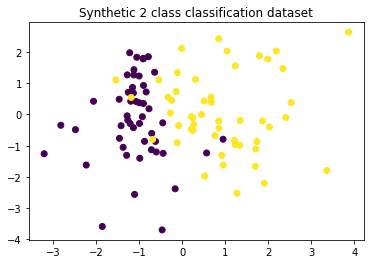

In [ ]:
plt.scatter(X_C2[:,0],X_C2[:,1],c=y_C2)
plt.title("Synthetic 2 class classification dataset")

In [ ]:
KNNSyn2Class = KNeighborsClassifier()
KNNSyn2Class.fit(X_train,y_train)

print("Knn on synthetic 2 class dataset")
print("Accuracy (Train): ", KNNSyn2Class.score(X_train,y_train))
print("Accuracy (Test): ", KNNSyn2Class.score(X_test,y_test))

Knn on synthetic 2 class dataset
Accuracy (Train):  0.9466666666666667
Accuracy (Test):  0.96


In [ ]:
from adspy_shared_utilities import plot_two_class_knn

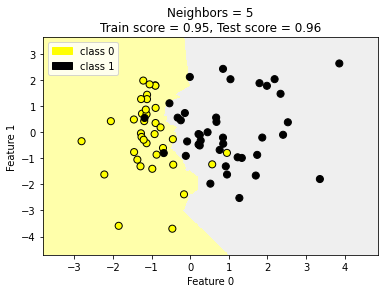

In [ ]:
plot_two_class_knn(X_train,y_train,5,'uniform',X_test,y_test)

* Observation: 
  * neighbors = 5 is causing the boundary to be a little fragmented even though the test score is very high. Higher value of **k** would be better. 

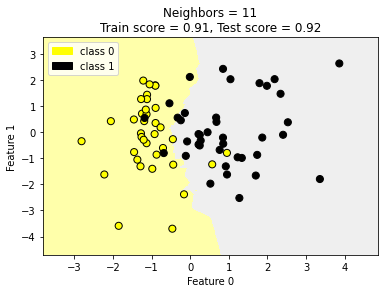

In [ ]:
plot_two_class_knn(X_train,y_train,11,'uniform',X_test,y_test)

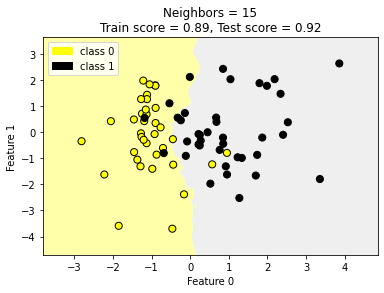

In [ ]:
plot_two_class_knn(X_train,y_train,15,'uniform',X_test,y_test)

* k = 15 has a much better decision boundary than the lower k values that were tried out. 
* Further fine tuning can be done by trying out more k values and evaluating the tradeoff between robust decision boundaries and test acccuracy. 

We now use the KNN algo for a regression dataset.

## Regression

#### Synthetic dataset (1 feature)

In [ ]:
X_R1,y_R1 = make_regression(n_samples=100,n_features=1,bias = 50,random_state = 0, noise=30)

Text(0, 0.5, 'Target Variable Value')

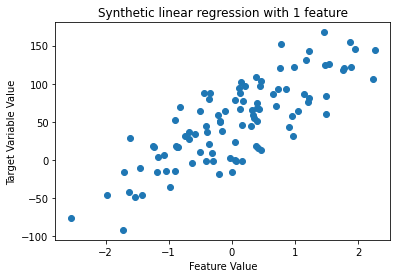

In [ ]:
plt.scatter(X_R1,y_R1)
plt.title('Synthetic linear regression with 1 feature')
plt.xlabel('Feature Value')
plt.ylabel('Target Variable Value')

In [ ]:
KNNReg = KNeighborsRegressor()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_R1,y_R1,random_state = 0)

In [ ]:
KNNReg.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
print("KNN Regression on single feature dataset")
print("R2 train:",KNNReg.score(X_train,y_train))
print("R2 test:", KNNReg.score(X_test,y_test))

KNN Regression on single feature dataset
R2 train: 0.7446598214732486
R2 test: 0.4246800858234565


* Plot knn decision boundary

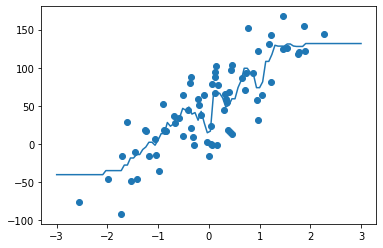

In [ ]:
plt.scatter(X_train,y_train)

new_inp = np.linspace(-3,3,100).reshape(-1,1)
pred_out = KNNReg.predict(new_inp)

plt.plot(new_inp,pred_out)

**KNN Model complexity as a function of k**

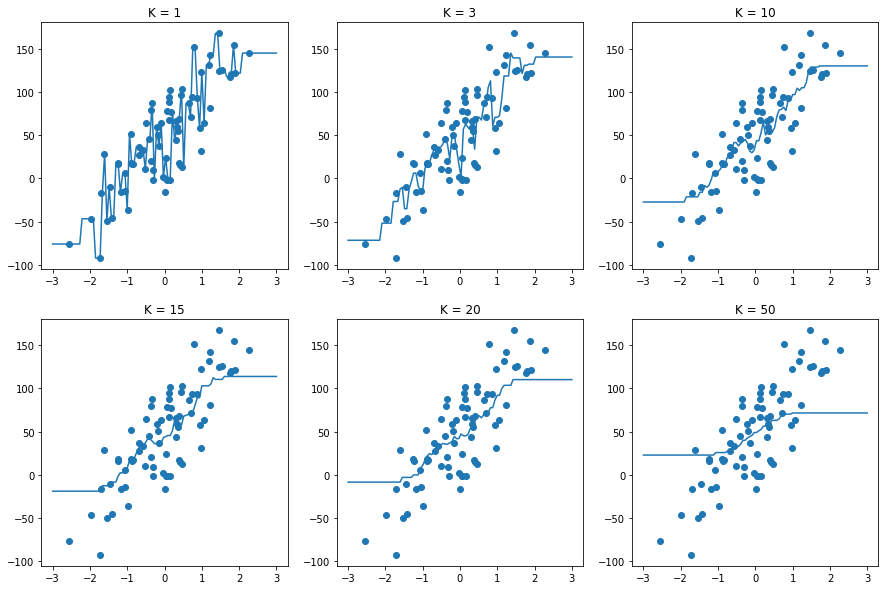

In [ ]:
i = 1
plt.figure(figsize = (15,10))
for k_itn in [1,3,10,15,20,50]:
  model_itn = KNeighborsRegressor(n_neighbors=k_itn)
  model_itn.fit(X_train,y_train)
  plt.subplot(2,3,i)
  plt.scatter(X_train,y_train)
  plt.plot(new_inp,model_itn.predict(new_inp))
  plt.title("K = {}".format(k_itn))
  i += 1

* High values of k start missing features in the dataset and very low values of k are susceptible to noise in the dataset. 
* Choice of k thus is dependent on the dataset and the problem at hand

# Summary

* k-nearest-neighbors is a non-parametric model which can be used for regression and classification. 

* A non-parametric model does not summarize the data in terms of a fixed set of parameters (like linear regression or neural networks) and such learning methods are also called instance-based learning or memory based learning. 

* It does well when there's lots of data available and the data is low dimensional. In high dimensionality, it suffers from the dimensionality curse. 

* The value of k must be chosen carefully through cross validation: very low value of k is susceptible to outliers/noise and very high value of k would miss out patterns in the dataset. 